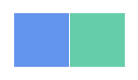

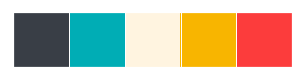

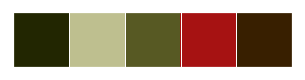

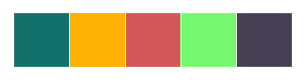

In [304]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
#custom colorscheme
custom_palette = ["#6495ED", "#66CDAA"]
blue_oranges = ["#393E46", "#00ADB5", "#FFF4E0", "#F8B500", "#FC3C3C"]
brown_reds = ["#222601", "#BEBF8F", "#575923", "#A61212", "#381F00"]
dunno = ["#12706A", "#FDB102", "#D1575A", "#77F66F", "#454054"]
sns.palplot(custom_palette)
sns.palplot(blue_oranges)
sns.palplot(brown_reds)
sns.palplot(dunno)
sns.set_palette(palette=dunno)

In [305]:
# split data into 8 different arrays
Diving_10m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Diving_10m')
Archery = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Archery')
Fencing_Epee = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Fencing_Epee')
Modern_Pentathlon = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Modern_Pentathlon')
Pole_Vault = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Pole_Vault')
Swimming_100m_Freestyle = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Swimming_100m_Freestyle')
Cycling_Road = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Cycling_Road')
Athletes_100m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Athletes_100m')

In [306]:
def plot_means(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [307]:
def plot_median(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [308]:
# t-test for male and female participants in athletics_100_m finals
#stats.ttest_ind(males, females)

def ttest(sportart,kategorie):
    '''conducts a t test for given competition
    
    Args:
        competition: olympic sports competition to evaluate
    
    Returns:
        statistic, pvalue : The calculated t-statistic and the two-tailed p-value.
    '''
    kat={'words':4,'edits':5,'links':6}
    k=kat[kategorie]
    
    # create subgroups of male and female atheletes
    men = sportart.loc[sportart['Gender'] == 'Men']
    women = sportart.loc[sportart['Gender'] == 'Women']
    
    print(kategorie)

    y_mean = [women['Wiki_Count'].mean(), men['Wiki_Count'].mean()]
    y_median = [women['Wiki_Count'].median(), men['Wiki_Count'].median()]
    mean_women = y_mean[0]
    mean_men = y_mean[1]
    
    print('%d women, mean: %f, median: %f' % (len(women), mean_women, y_median[0]) )
    print('%d men, mean: %f, median: %f' % (len(men), mean_men, y_median[1]) )  
    
    plt.subplot(1, 2, 1)
    plot_means([mean_women, mean_men])
    plt.subplot(1, 2, 2)
    plot_median([y_median[0], y_median[1]])

    plt.show()
    
    # conduct t test
    
    return stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])

words
80 women, mean: 335.287500, median: 124.500000
84 men, mean: 511.416667, median: 156.000000


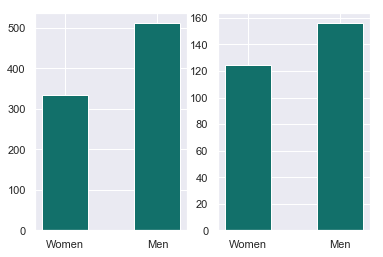

Ttest_indResult(statistic=1.189863660402363, pvalue=0.23584084769518676)


In [309]:
# words,edits,links
print(ttest(Athletes_100m,'words')) 

In [310]:
# Put all data in one dataframe
alldata = pd.DataFrame(Diving_10m).append(Archery).append(Fencing_Epee).append(Modern_Pentathlon).append(Pole_Vault).append(Swimming_100m_Freestyle).append(Cycling_Road).append(Athletes_100m)

In [311]:
descriptions = []

for row in alldata.iterrows():
    desc = row[1][1] + ' ' + row[1][2]
    descriptions.append(desc)
    
alldata['Description'] = np.asarray(descriptions)

In [312]:
allmen = alldata.loc[alldata['Gender'] == 'Men']
allwomen = alldata.loc[alldata['Gender'] == 'Women']
withoutMen = alldata.loc[alldata['Gender'] != 'Men']
unassigned = withoutMen.loc[withoutMen['Gender'] != 'Women']

print('Women: ' + str(len(allwomen)) + ' Men: ' + str(len(allmen)) + ' Unassigned: ' + str(len(unassigned)))

Women: 398 Men: 372 Unassigned: 0


In [313]:
#Extreme values on word count column
def extremes_per_sport_wordcount(data, gender):
    #list of all sports disciplines to be used as indices in resulting data frame
    disciplines = data.Event.unique()
    #column names to be used in resulting data frame
    cols = ['Max', 'Min', 'Mean', 'Median']
    max = []
    min = []
    mean = []
    median = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Event'] == discipline]
        max.append(all_for_discipline.Wiki_Count.max())
        min.append(all_for_discipline.Wiki_Count.min())
        mean.append(all_for_discipline.Wiki_Count.mean())
        median.append(all_for_discipline.Wiki_Count.median())
    return pd.DataFrame({'Max' :np.asarray(max),
                         'Min' :np.asarray(min),
                         'Mean':np.asarray(mean),
                         'Median':np.asarray(median)}, index=disciplines)

In [357]:
def plot_wordcount(data):
    # labels for y axis
    labels = data.Description.unique()
    # amount of ticks on y axis
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport_wordcount(data, 'Men')
    extremes_women = extremes_per_sport_wordcount(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(2,2,figsize=(60,15))
    ax[0,0].bar(ind + width/2, extremes_women.Max, width, label='Women')
    ax[0,0].bar(ind - width/2, extremes_men.Max, width, label='Men')
    
    ax[0,0].legend()
    ax[0,0].set_xticks(ind)
    ax[0,0].set_xticklabels(labels)
    ax[0,0].set_ylabel('Word Count')
    ax[0,0].set_title('Max Word Count')
    
    ax[1,0].bar(ind + width/2, extremes_women.Min, width, label='Women')
    ax[1,0].bar(ind - width/2, extremes_men.Min, width, label='Men')
    
    ax[1,0].legend()
    
    ax[1,0].set_xticks(ind)
    ax[1,0].set_xticklabels(labels)
    ax[1,0].set_ylabel('Word Count')
    ax[1,0].set_title('Min Word Count')
    
    ax[0,1].bar(ind + width/2, extremes_women.Mean, width, label='Women')
    ax[0,1].bar(ind - width/2, extremes_men.Mean, width, label='Men')
    
    ax[0,1].legend()
    
    ax[0,1].set_xticks(ind)
    ax[0,1].set_xticklabels(labels)
    ax[0,1].set_ylabel('Word Count')
    ax[0,1].set_title('Mean Word Count')
    
    ax[1,1].bar(ind + width/2, extremes_women.Median, width, label='Women')
    ax[1,1].bar(ind - width/2, extremes_men.Median, width, label='Men')
    
    ax[1,1].legend()
    
    ax[1,1].set_xticks(ind)
    ax[1,1].set_xticklabels(labels)
    ax[1,1].set_ylabel('Word Count')
    ax[1,1].set_title('Median Word Count')
 
#     plt.show()
    plt.savefig("wordcount_extrema.png")

<Figure size 432x288 with 0 Axes>

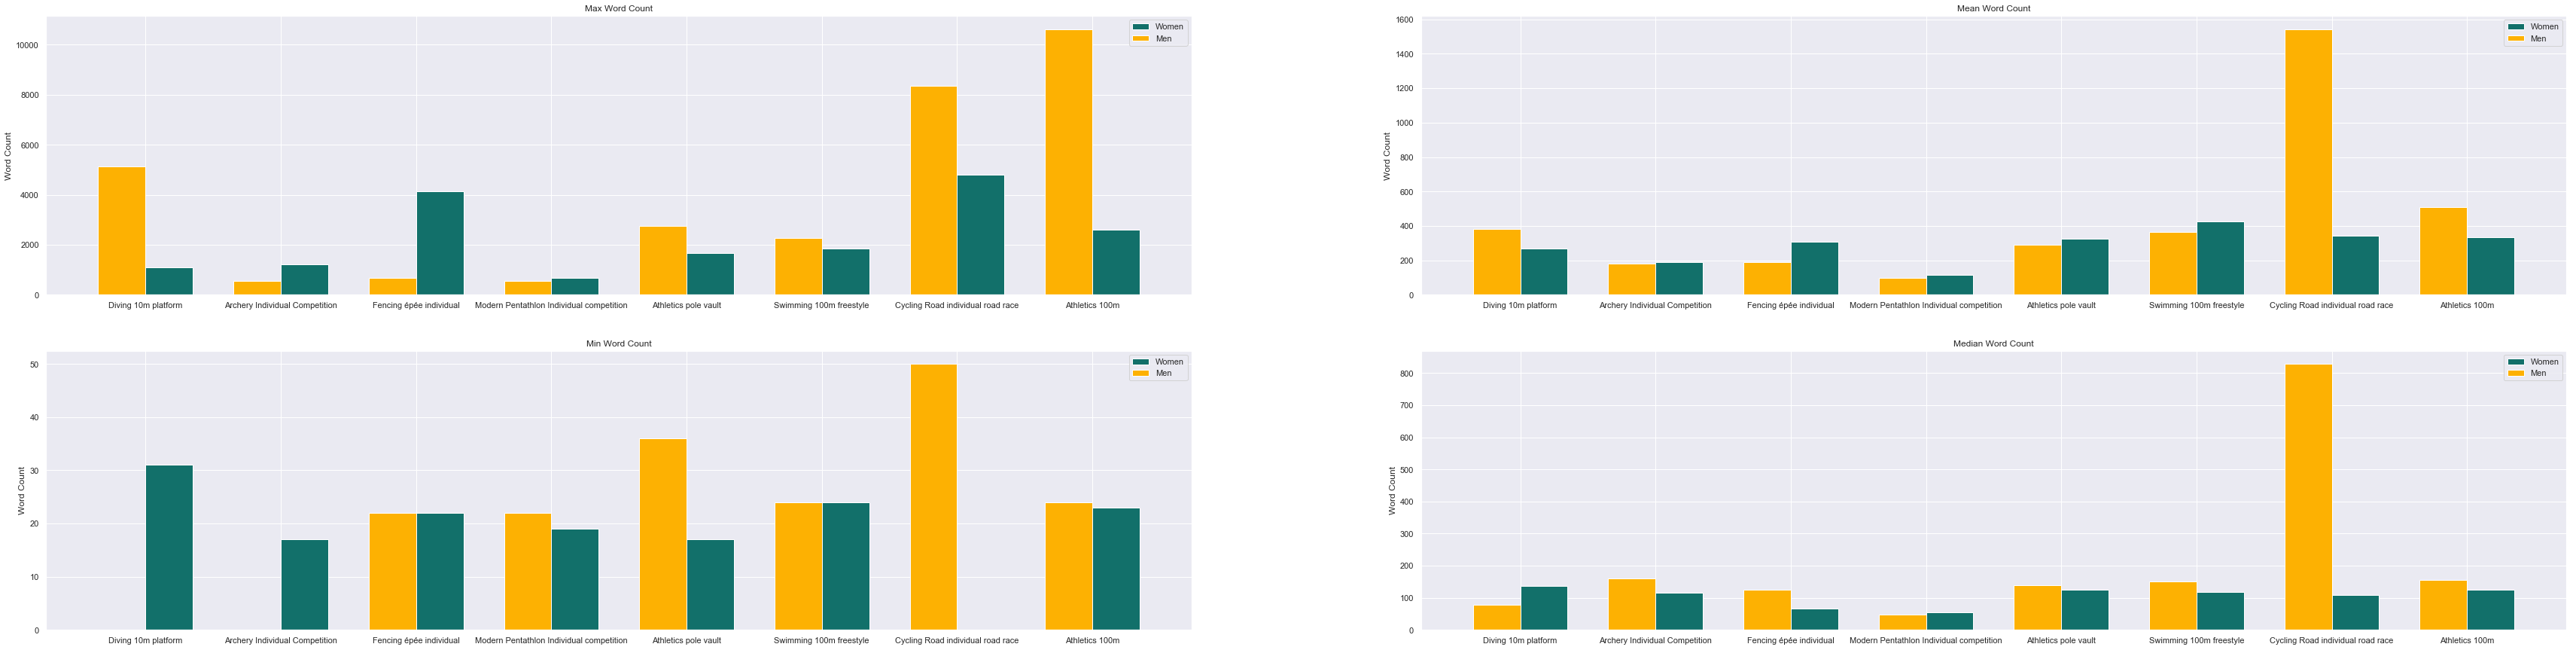

In [358]:
plot_wordcount(alldata)

In [316]:
#Extreme values on edit column
def extremes_per_sport_edits(data, gender):
    disciplines = data.Event.unique()
    cols = ['Max_Edits', 'Min_Edits', 'Mean_Edits', 'Median_Edits']
    max = []
    min = []
    mean = []
    median = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Event'] == discipline]
        max.append(all_for_discipline.Edits.max())
        min.append(all_for_discipline.Edits.min())
        mean.append(all_for_discipline.Edits.mean())
        median.append(all_for_discipline.Edits.median())
    return pd.DataFrame({'Max_Edits' :np.asarray(max),
                         'Min_Edits' :np.asarray(min),
                         'Mean_Edits':np.asarray(mean),
                         'Median_Edits':np.asarray(median)}, index=disciplines)

In [355]:
def plot_edits(data):
    labels = data.Description.unique()
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport_edits(data, 'Men')
    extremes_women = extremes_per_sport_edits(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(2,2, figsize=(60,15))
    ax[0,0].bar(ind + width/2, extremes_women.Max_Edits, width, label='Women')
    ax[0,0].bar(ind - width/2, extremes_men.Max_Edits, width, label='Men')
    
    ax[0,0].legend()
    ax[0,0].set_xticks(ind)
    ax[0,0].set_xticklabels(labels)
    ax[0,0].set_ylabel('Edits')
    ax[0,0].set_title('Max Edits')
        
    ax[1,0].bar(ind + width/2, extremes_women.Min_Edits, width, label='Women')
    ax[1,0].bar(ind - width/2, extremes_men.Min_Edits, width, label='Men')
    
    ax[1,0].legend()
    ax[1,0].set_xticks(ind)
    ax[1,0].set_xticklabels(labels)
    ax[1,0].set_ylabel('Edits')
    ax[1,0].set_title('Min Edits')
    
    ax[0,1].bar(ind + width/2, extremes_women.Mean_Edits, width, label='Women')
    ax[0,1].bar(ind - width/2, extremes_men.Mean_Edits, width, label='Men')
    
    ax[0,1].legend()
    ax[0,1].set_xticks(ind)
    ax[0,1].set_xticklabels(labels)
    ax[0,1].set_ylabel('Edits')
    ax[0,1].set_title('Mean Edits')
    
    ax[1,1].bar(ind + width/2, extremes_women.Median_Edits, width, label='Women')
    ax[1,1].bar(ind - width/2, extremes_men.Median_Edits, width, label='Men')
    
    ax[1,1].legend()
    ax[1,1].set_xticks(ind)
    ax[1,1].set_xticklabels(labels)
    ax[1,1].set_ylabel('Edits')
    ax[1,1].set_title('Median Edits')
 
#     plt.show()
    plt.savefig("editcount_extrema.png")

<Figure size 432x288 with 0 Axes>

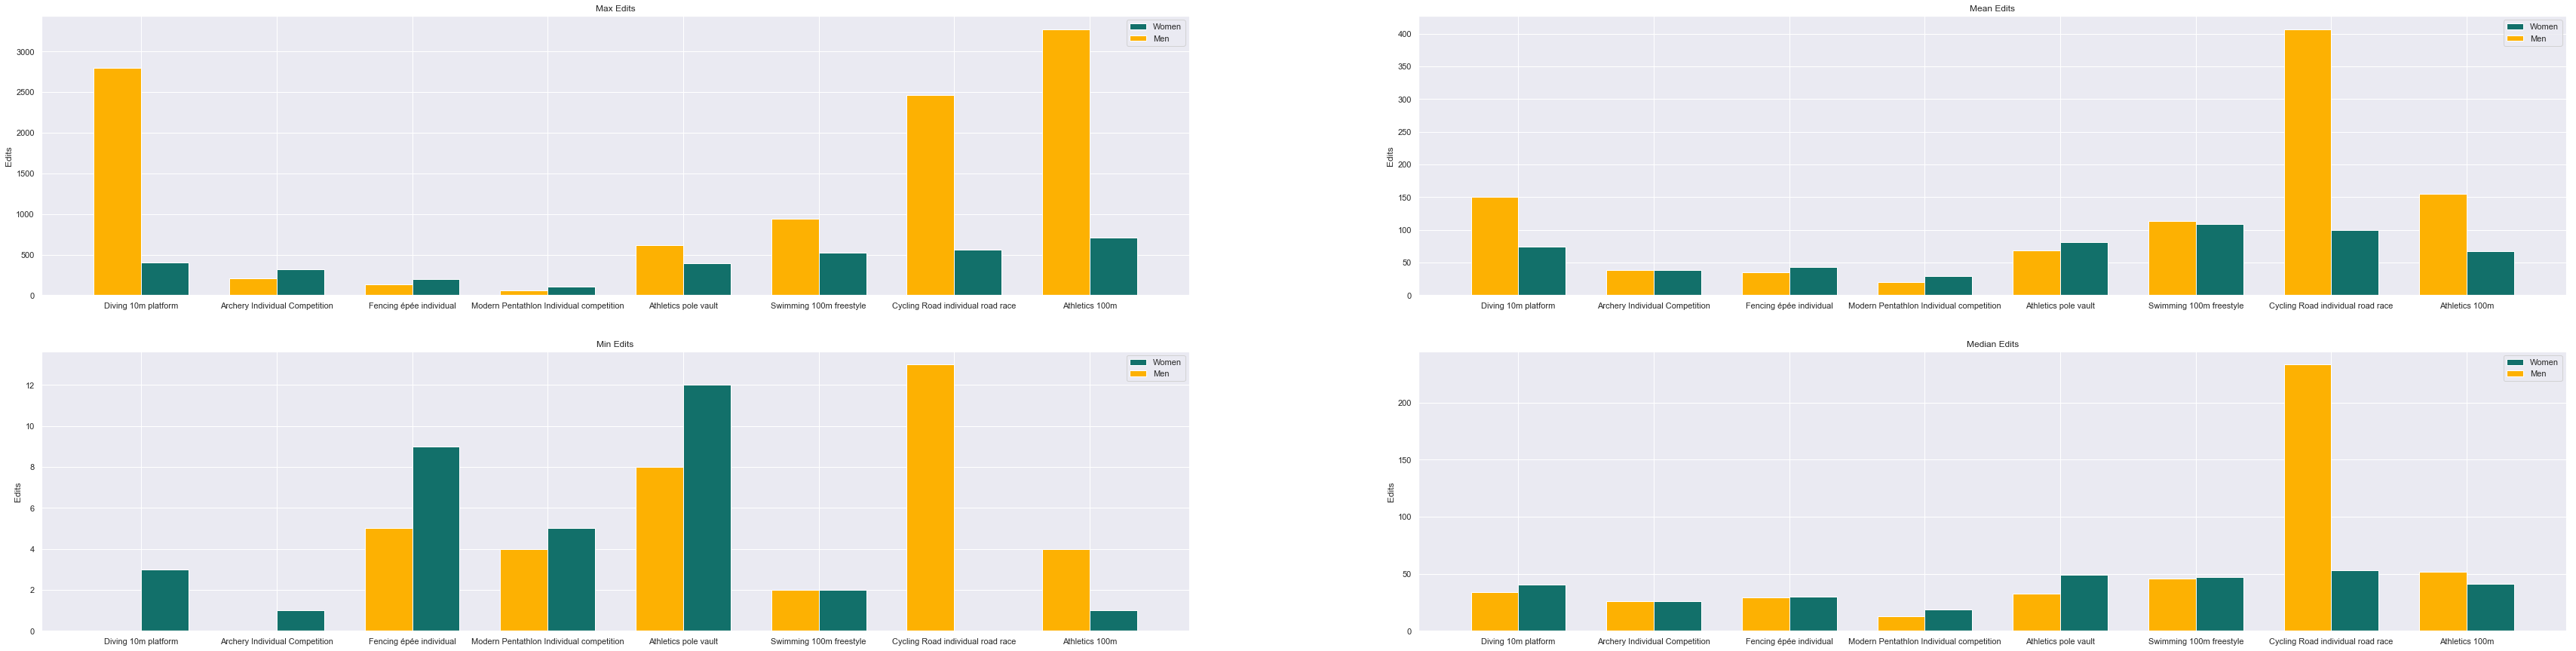

In [356]:
plot_edits(alldata)

In [319]:
extremes_per_sport_wordcount(alldata, 'Men')

,Max,Min,Mean,Median
10m platform,5120,0,382.310345,79.0
Individual Competition,546,0,182.281250,161.0
épée individual,668,22,190.710526,126.0
Individual competition,545,22,99.361111,48.0
pole vault,2753,36,291.843750,139.5
100m freestyle,2259,24,366.033898,150.0
individual road race,8348,50,1543.433333,828.5
100m,10628,24,511.416667,156.0


In [320]:
extremes_per_sport_wordcount(alldata, 'Women')

,Max,Min,Mean,Median
10m platform,1096,31,270.500000,137.5
Individual Competition,1228,17,191.500000,116.0
épée individual,4143,22,307.729730,67.0
Individual competition,678,19,116.222222,54.0
pole vault,1665,17,323.921053,125.0
100m freestyle,1851,24,425.166667,119.0
individual road race,4787,0,343.014925,108.0
100m,2619,23,335.287500,124.5


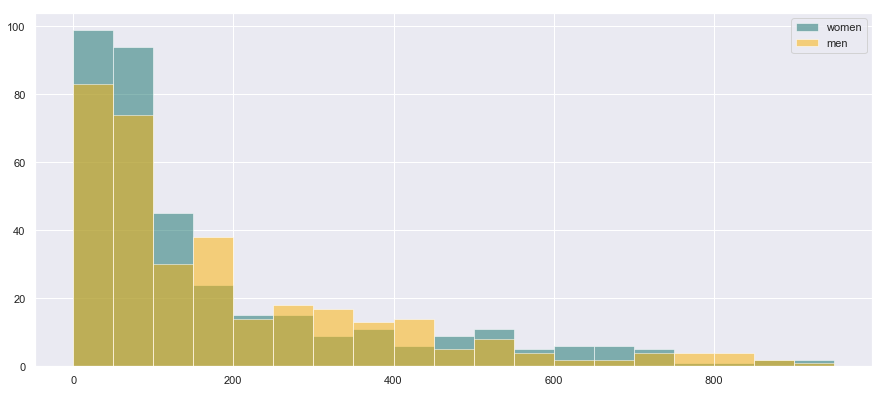

In [321]:
#gendered histogram of all word count data
women = alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count
men = alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count

bins = range(0, 1000, 50)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")

plt.legend()
# plt.show()
plt.savefig("wordcount_histogram.png")

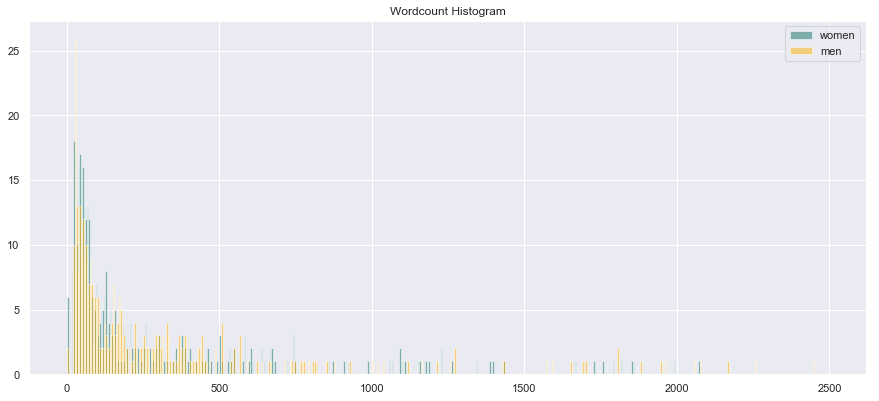

In [344]:
#gendered histogram of all word count data
women = alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count
men = alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count

bins = range(0, 2500, 5)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")

plt.legend()
plt.title("Wordcount Histogram")
# plt.show()
plt.savefig("wordcount_small_bins_histogram.png")

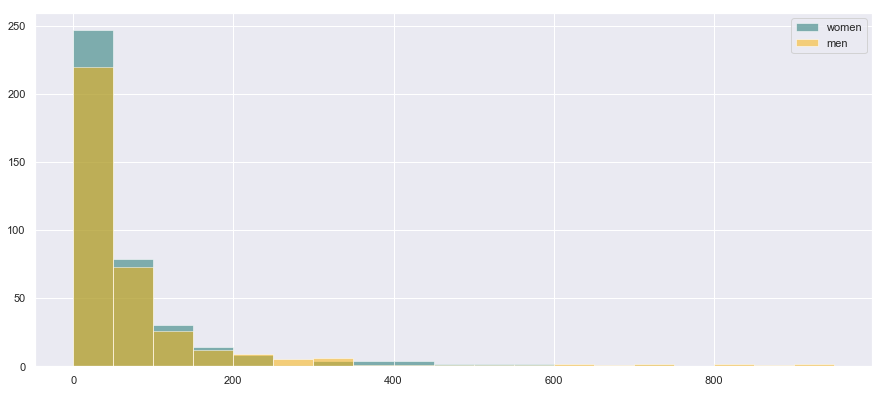

In [323]:
#gendered histogram of all edit data
men = alldata.loc[alldata['Gender'] == 'Men'].Edits
women = alldata.loc[alldata['Gender'] == 'Women'].Edits

bins = range(0, 1000, 50)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")


plt.legend()
# plt.show()
plt.savefig("editcount_histogram.png")

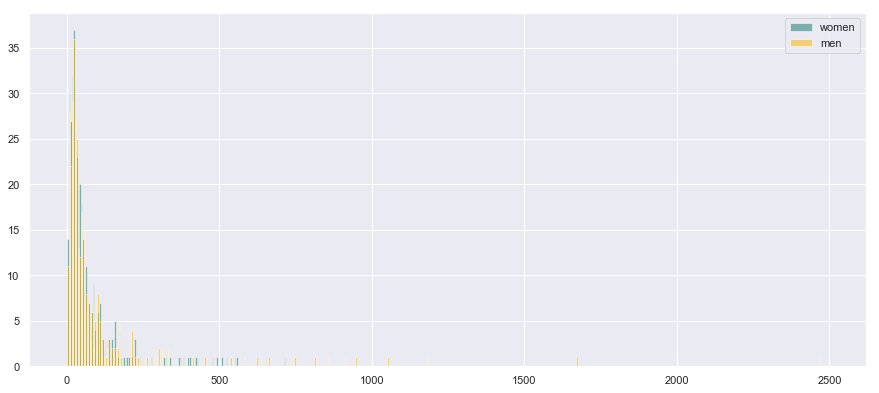

In [324]:
#gendered histogram of all edit data
men = alldata.loc[alldata['Gender'] == 'Men'].Edits
women = alldata.loc[alldata['Gender'] == 'Women'].Edits

bins = range(0, 2500, 5)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="#12706A")
plt.hist(men, bins, alpha=0.5, label='men', color="#FDB102")


plt.legend()
# plt.show()
plt.savefig("editcount_small_bins_histogram.png")

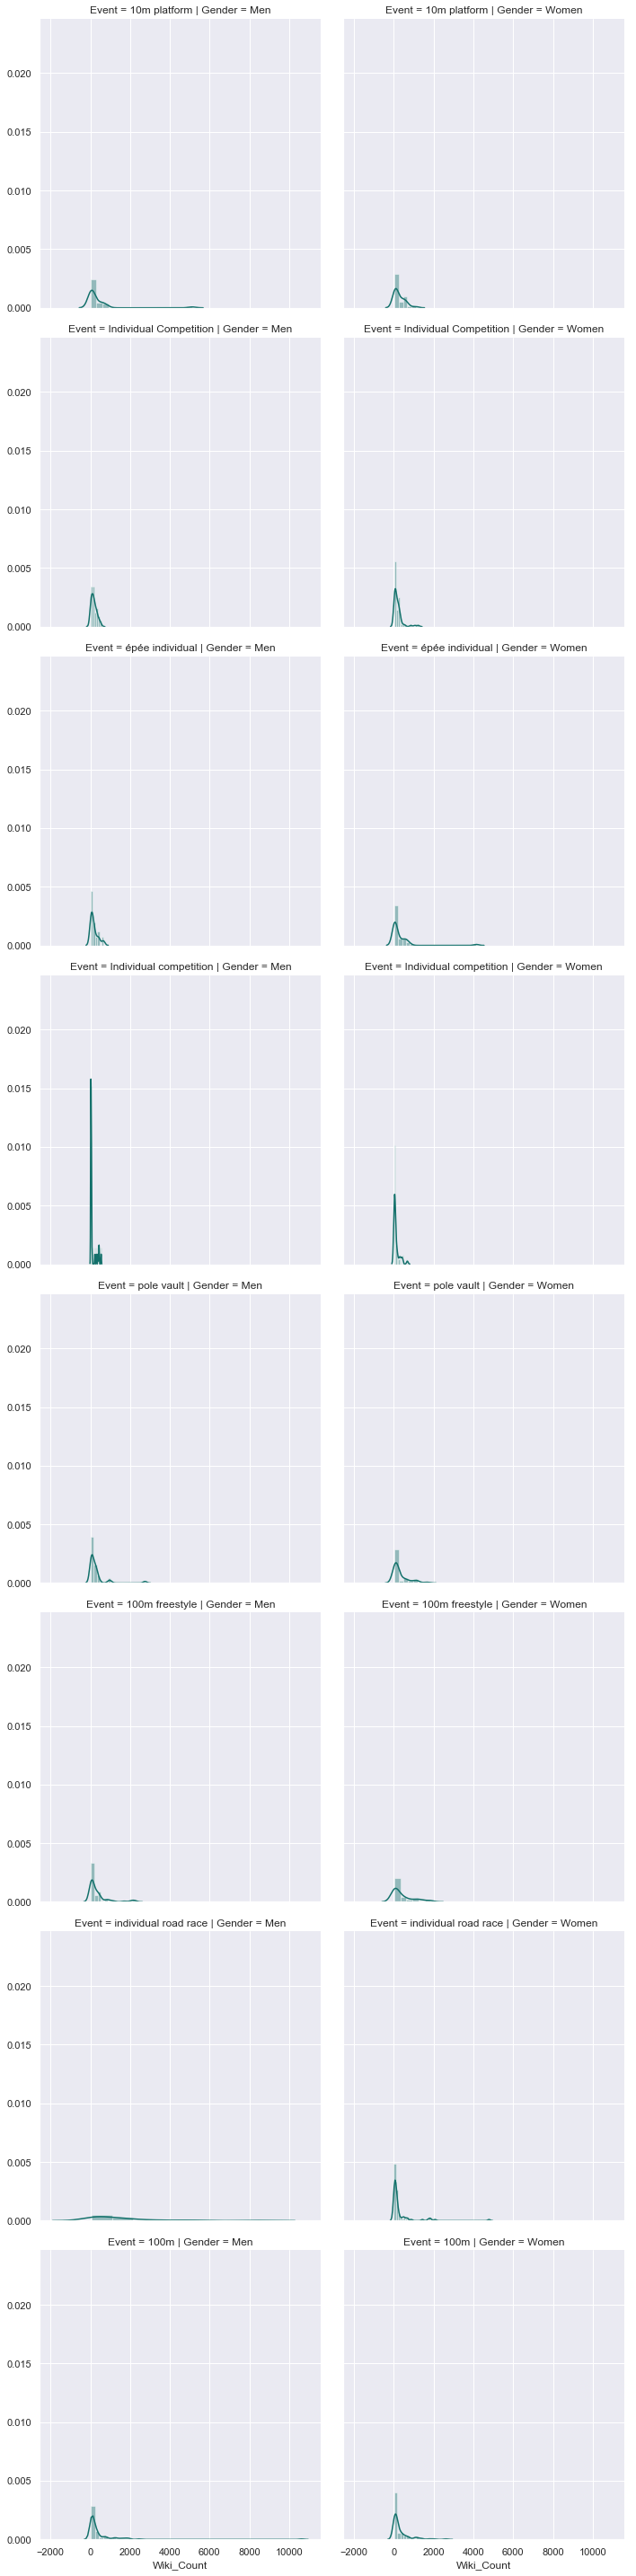

In [325]:
#histograms using fancy seaborn but the result is kind of strange ...
g = sns.FacetGrid(alldata, col="Gender", row="Event", height=5, aspect=1)
# g = (g.map(plt.hist,"Wiki_Count").set_titles("{col_name}"))
g = g.map(sns.distplot, "Wiki_Count")
g.savefig("wordcount_disciplines_distplot")

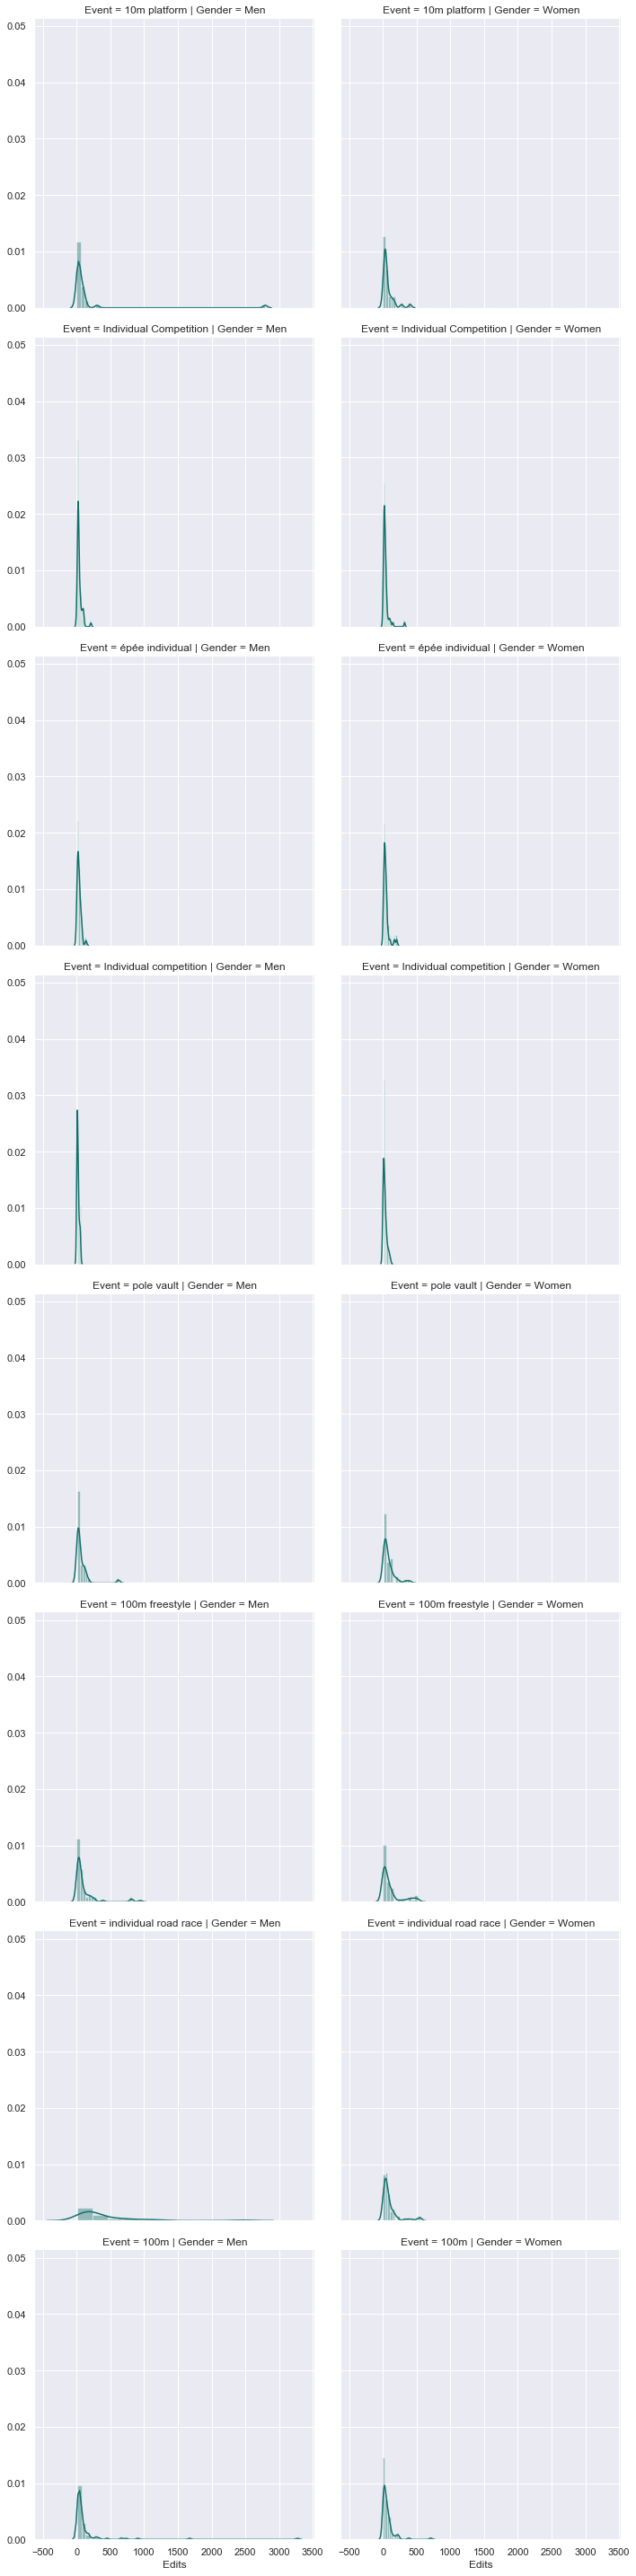

In [326]:
#same seaborn histograms but for edits instead of word count
g = sns.FacetGrid(alldata, col="Gender", row="Event", height=5, aspect=1)
g = g.map(sns.distplot, "Edits")
g.savefig("editcount_disciplines_distplot")

<Figure size 432x288 with 0 Axes>

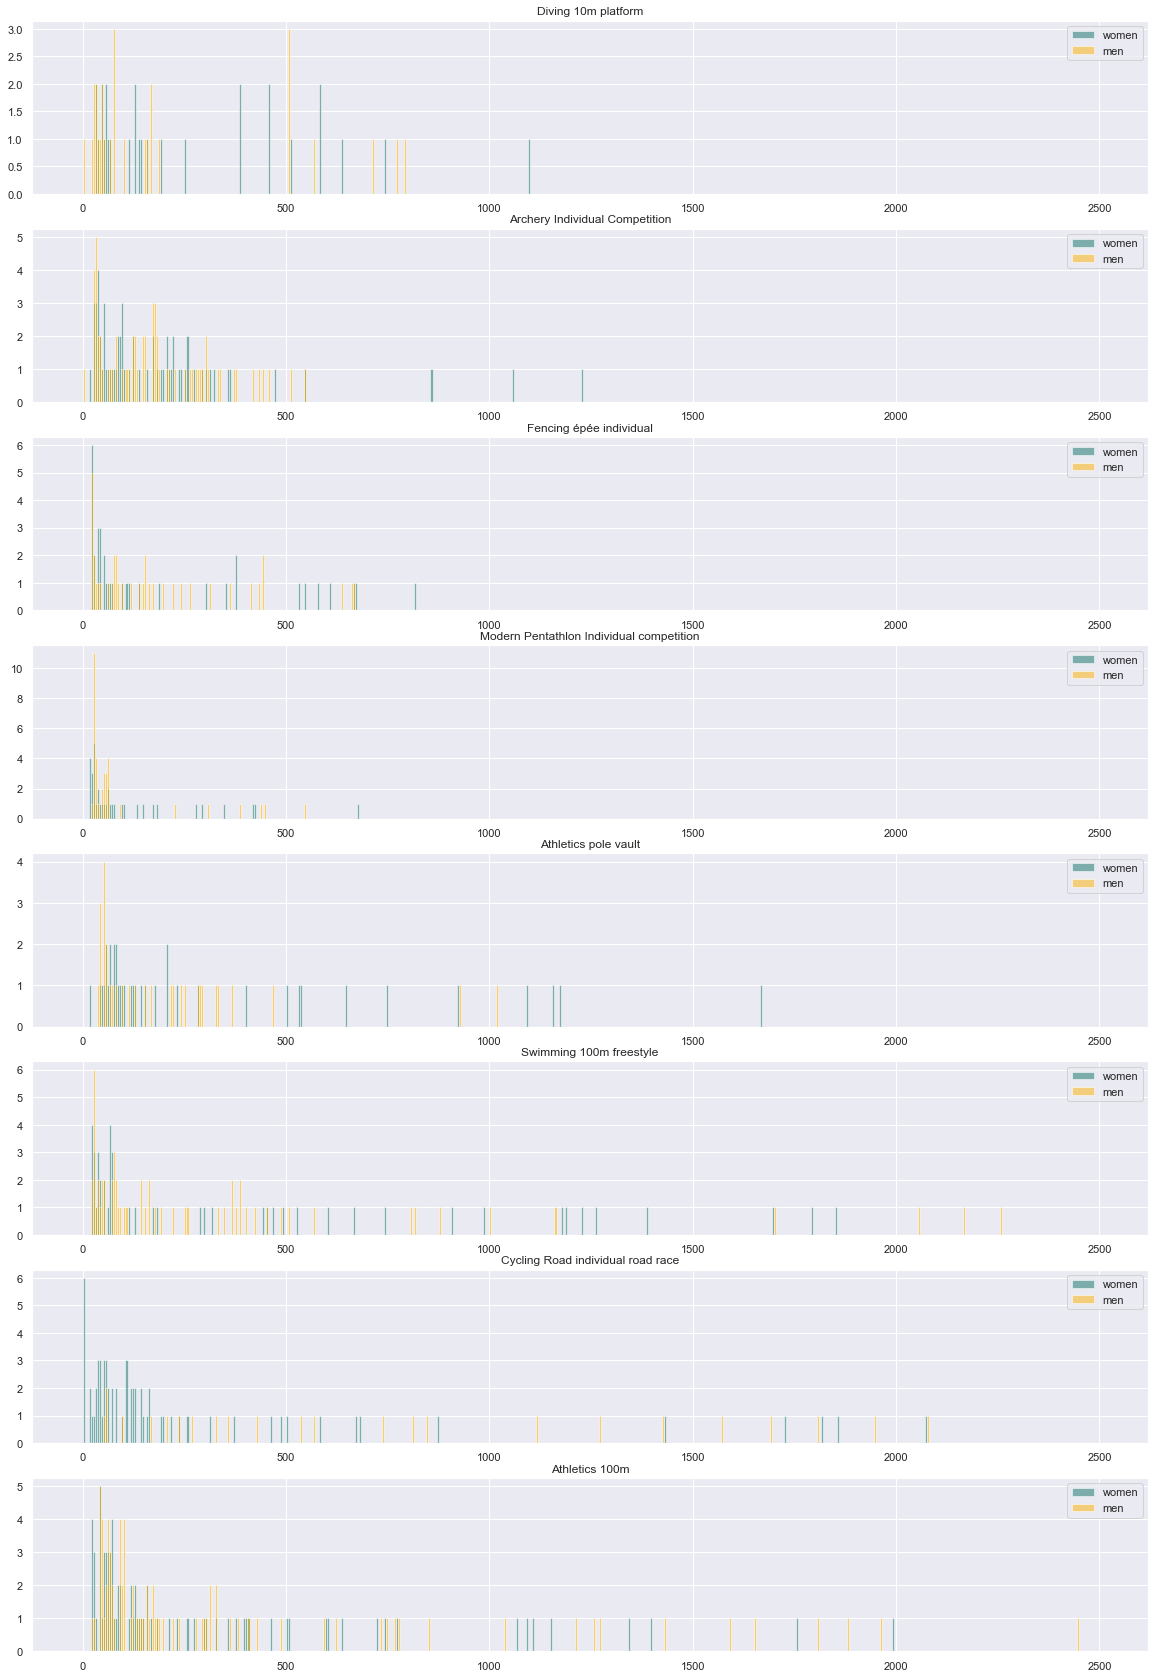

In [347]:
#word count histograms using normal matplotlib
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
#This plot doesn't show all data
bins = range(0, 2500, 5)

all_disciplines = np.asarray(alldata.Event.unique())
amout_of_graphs = len(all_disciplines)
plt.figure(1)
fig, ax = plt.subplots(amout_of_graphs,1, figsize=(20,30))
for row_number in range(0, amout_of_graphs):
    ax[row_number].hist(women.loc[women['Event'] == all_disciplines[row_number]].Wiki_Count, bins, color="#12706A", alpha=0.5, label='women')
    ax[row_number].hist(men.loc[men['Event'] == all_disciplines[row_number]].Wiki_Count, bins, color="#FDB102", alpha=0.5, label='men')
    ax[row_number].legend()
    ax[row_number].set_title(alldata.Description.unique()[row_number])
    
plt.savefig("wordcount_disciplines_histogram_contrast.png")

<Figure size 432x288 with 0 Axes>

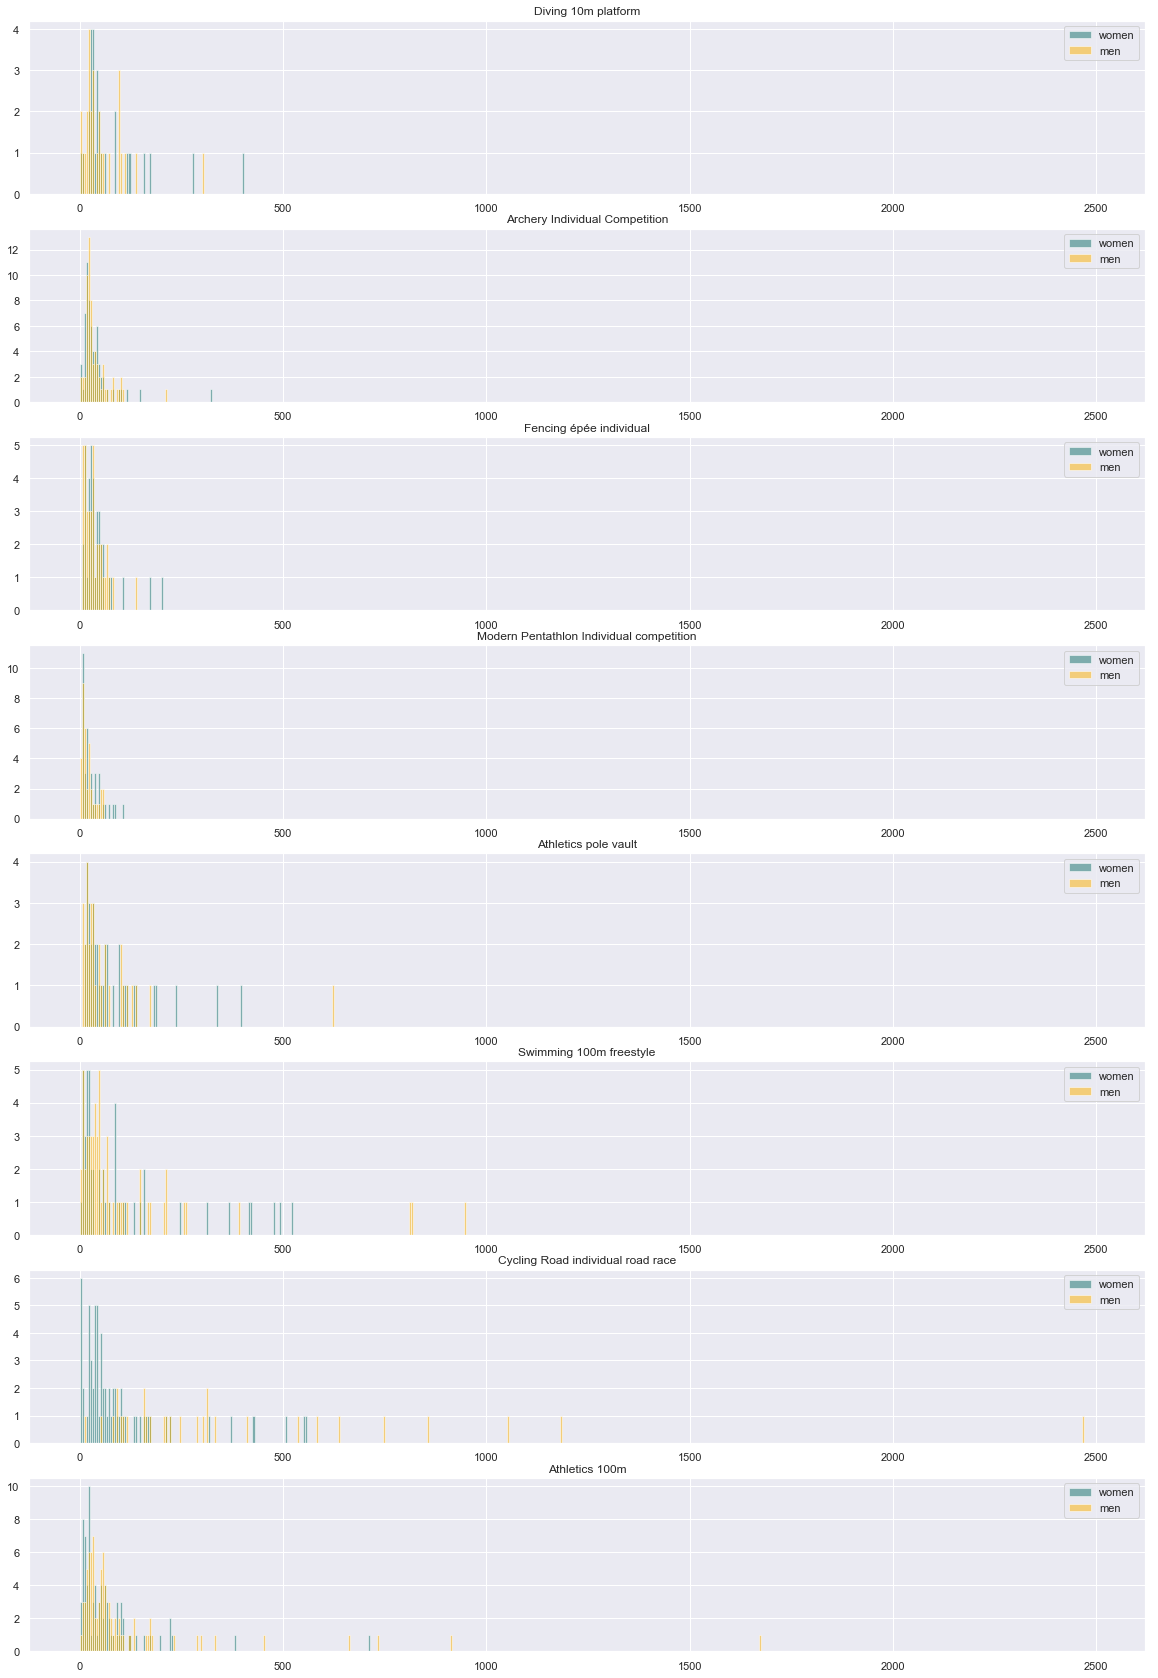

In [354]:
#edits histograms using normal matplotlib
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
bins = range(0, 2500, 5)

all_disciplines = np.asarray(alldata.Event.unique())
amout_of_graphs = len(all_disciplines)
plt.figure(1)
fig, ax = plt.subplots(amout_of_graphs,1, figsize=(20,30))
for row_number in range(0, amout_of_graphs):
    ax[row_number].hist(women.loc[women['Event'] == all_disciplines[row_number]].Edits, bins, color="#12706A", alpha=0.5, label='women')
    ax[row_number].hist(men.loc[men['Event'] == all_disciplines[row_number]].Edits, bins, color="#FDB102", alpha=0.5, label='men')
    ax[row_number].legend()
    ax[row_number].set_title(alldata.Description.unique()[row_number])
    
plt.savefig("editcount_disciplines_histogram_contrast.png")

In [329]:
#all ttests
# stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])
# men = alldata.loc[alldata['Gender'] == 'Men']
# women = alldata.loc[alldata['Gender'] == 'Women']
# all_disciplines = np.asarray(alldata.Event.unique())
# amout_of_disciplines = len(all_disciplines)
# ttest_results = []
# pvalues = []
# for discipline in all_disciplines:
#     ttest_result = stats.ttest_ind(men.loc[men['Event'] == discipline].Wiki_Count,
#                                          women.loc[women['Event'] == discipline].Wiki_Count)
#     ttest_results.append(ttest_result.statistic)
#     pvalues.append(ttest_result.pvalue)

# pd.DataFrame({'Discipline' :np.asarray(alldata.Description.unique()),
#               'Ttest Statistic' :np.asarray(ttest_results),
#               'P Value': np.asarray(pvalues)})

In [330]:
#Number of ppl of specified gender per sport
#This method is mostly for us
def gender_per_sport(data):
    disciplines = data.Event.unique()
    indices = data.Description.unique()
    female = []
    male = []
    equal_genders = []
    allwomen = data.loc[data['Gender'] == 'Women']
    allmen = data.loc[data['Gender'] == 'Men']
    for discipline in disciplines:
        amount_of_women = len(allwomen.loc[allwomen['Event'] == discipline])
        amount_of_men = len(allmen.loc[allmen['Event'] == discipline])
        female.append(amount_of_women)
        male.append(amount_of_men)
        if amount_of_men == amount_of_women:
            equal_genders.append('true')
        else:
            equal_genders.append('false')
    return pd.DataFrame({'f':np.asarray(female),
                        'm': np.asarray(male),
                        'equal': np.asarray(equal_genders)}, index=indices)

In [331]:
gender_per_sport(alldata)
#Male and female athletes per sport, where there are equal numbers of participants

,f,m,equal
Diving 10m platform,28,29,false
Archery Individual Competition,64,64,true
Fencing épée individual,37,38,false
Modern Pentathlon Individual competition,36,36,true
Athletics pole vault,38,32,false
Swimming 100m freestyle,48,59,false
Cycling Road individual road race,67,30,false
Athletics 100m,80,84,false


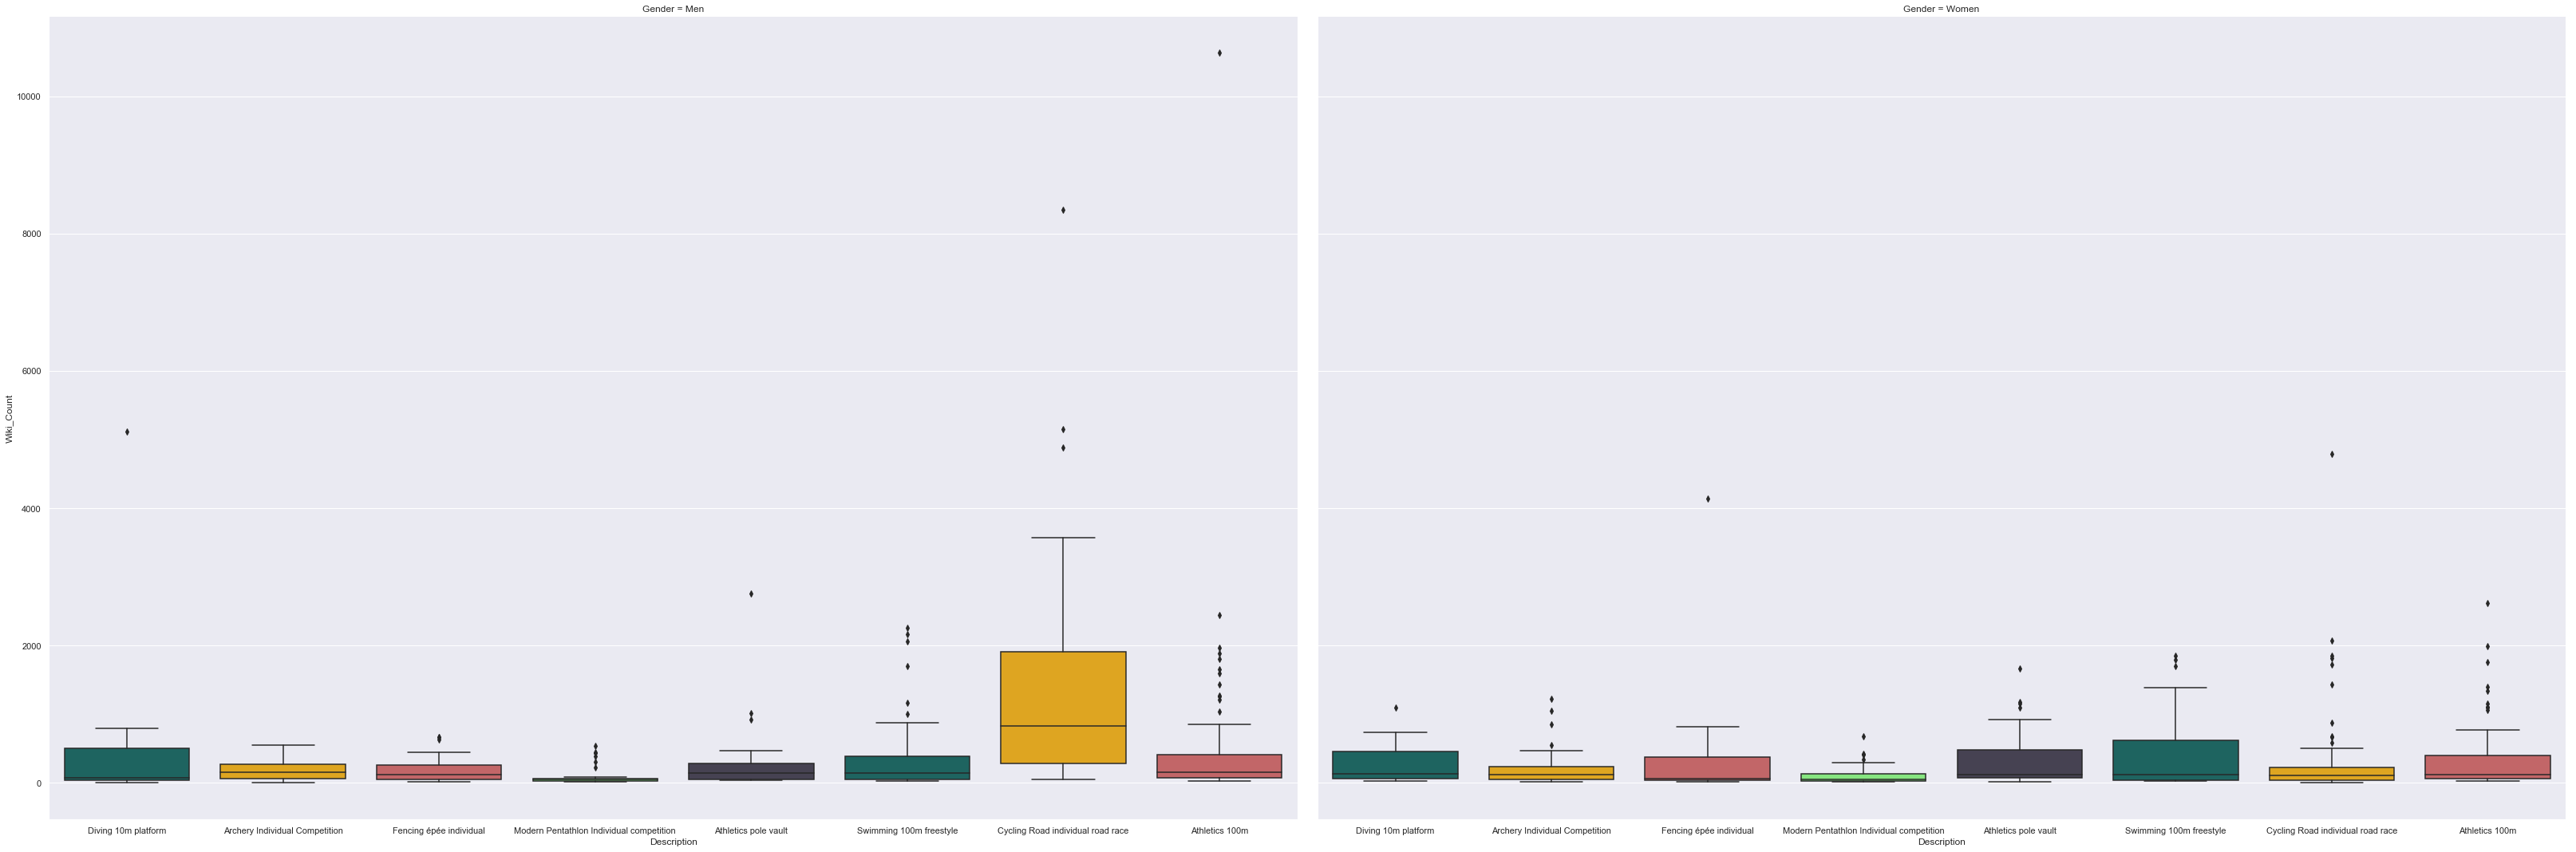

In [350]:
#boxplot for word count
g = sns.FacetGrid(alldata, col="Gender", height=15, aspect=1.5)
g.map(sns.boxplot,"Description", "Wiki_Count", order=alldata.Description.unique(), palette=["#12706A", "#FDB102", "#D1575A", "#77F66F", "#454054"])
g.savefig("wordcount_boxplot.png")

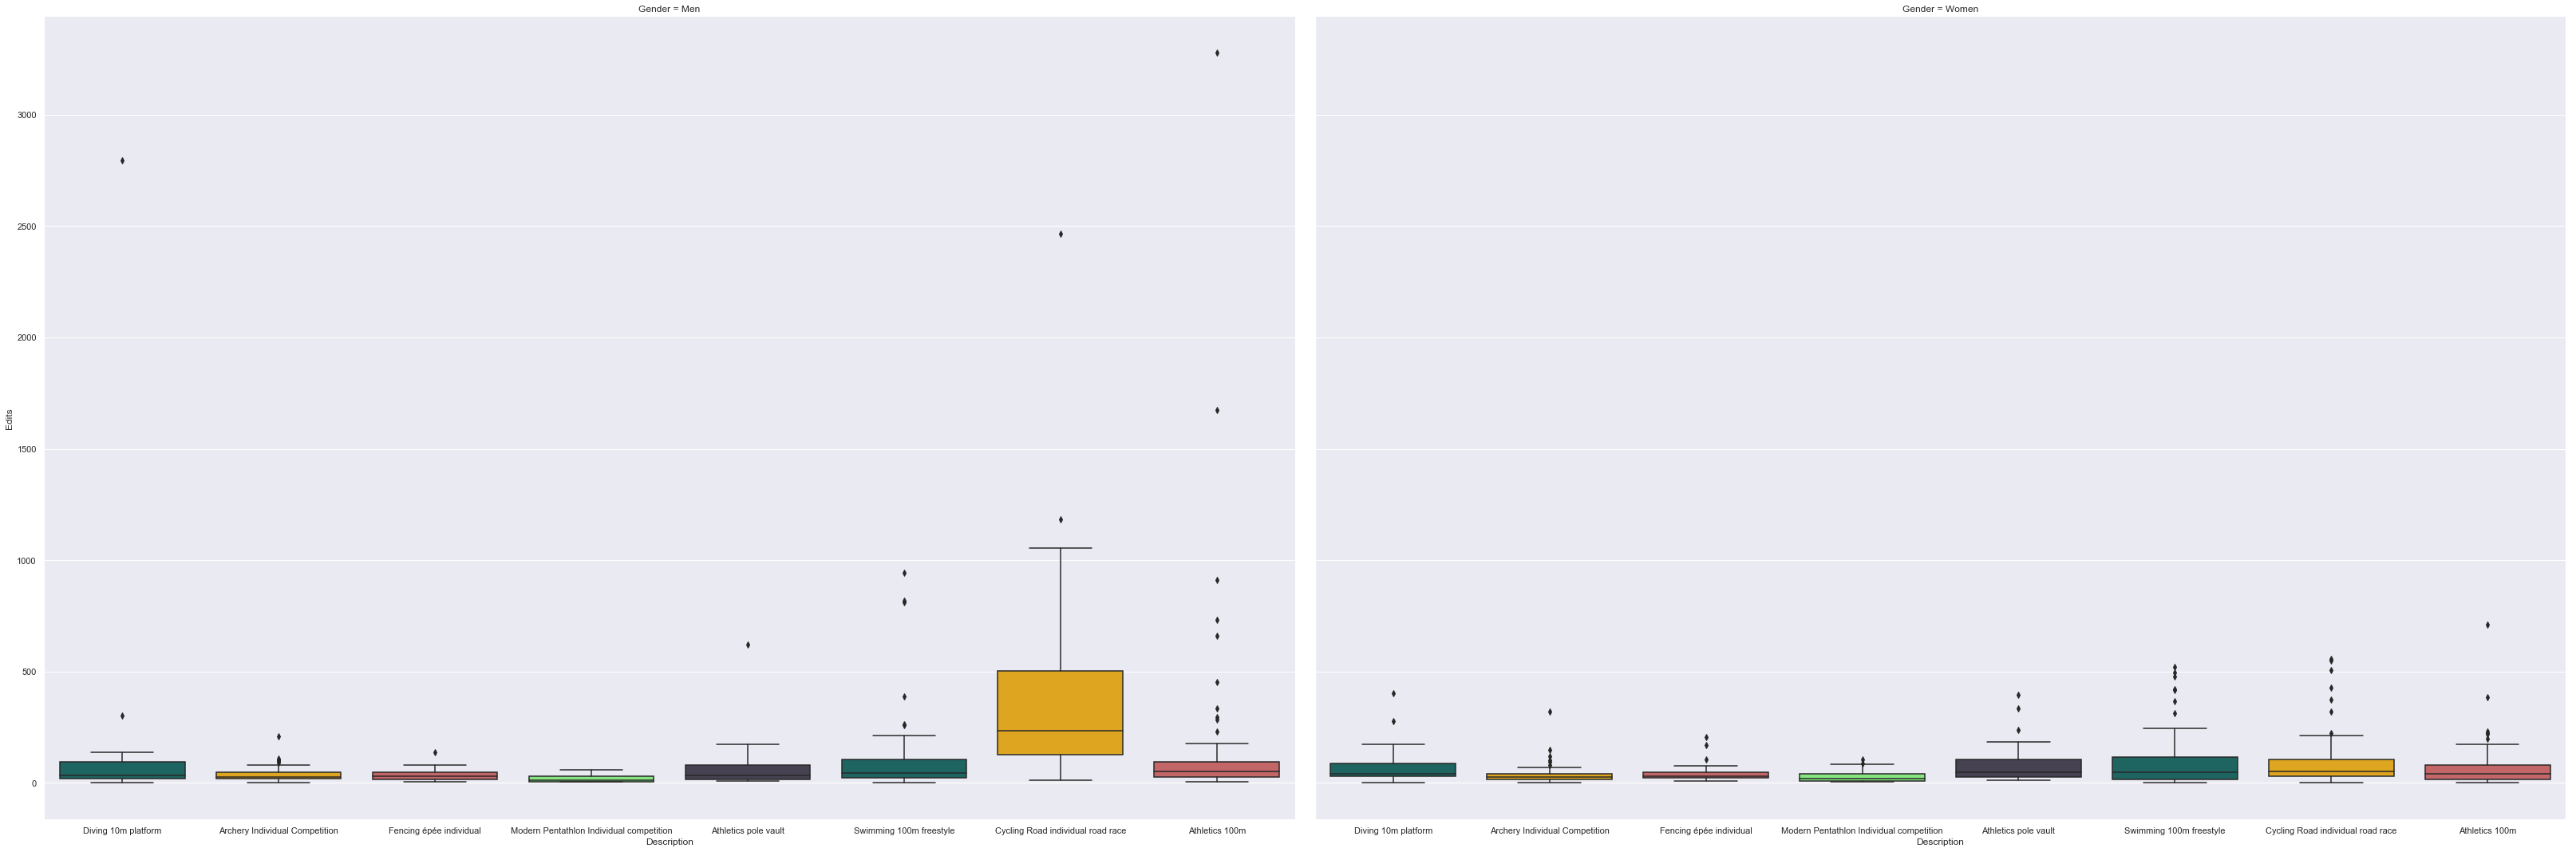

In [351]:
#boxplot for edits
g = sns.FacetGrid(alldata, col="Gender", height=15, aspect=1.5)
g.map(sns.boxplot,"Description", "Edits", order=alldata.Description.unique(), palette=["#12706A", "#FDB102", "#D1575A", "#77F66F", "#454054"])
g.savefig("editcount_boxplot.png")

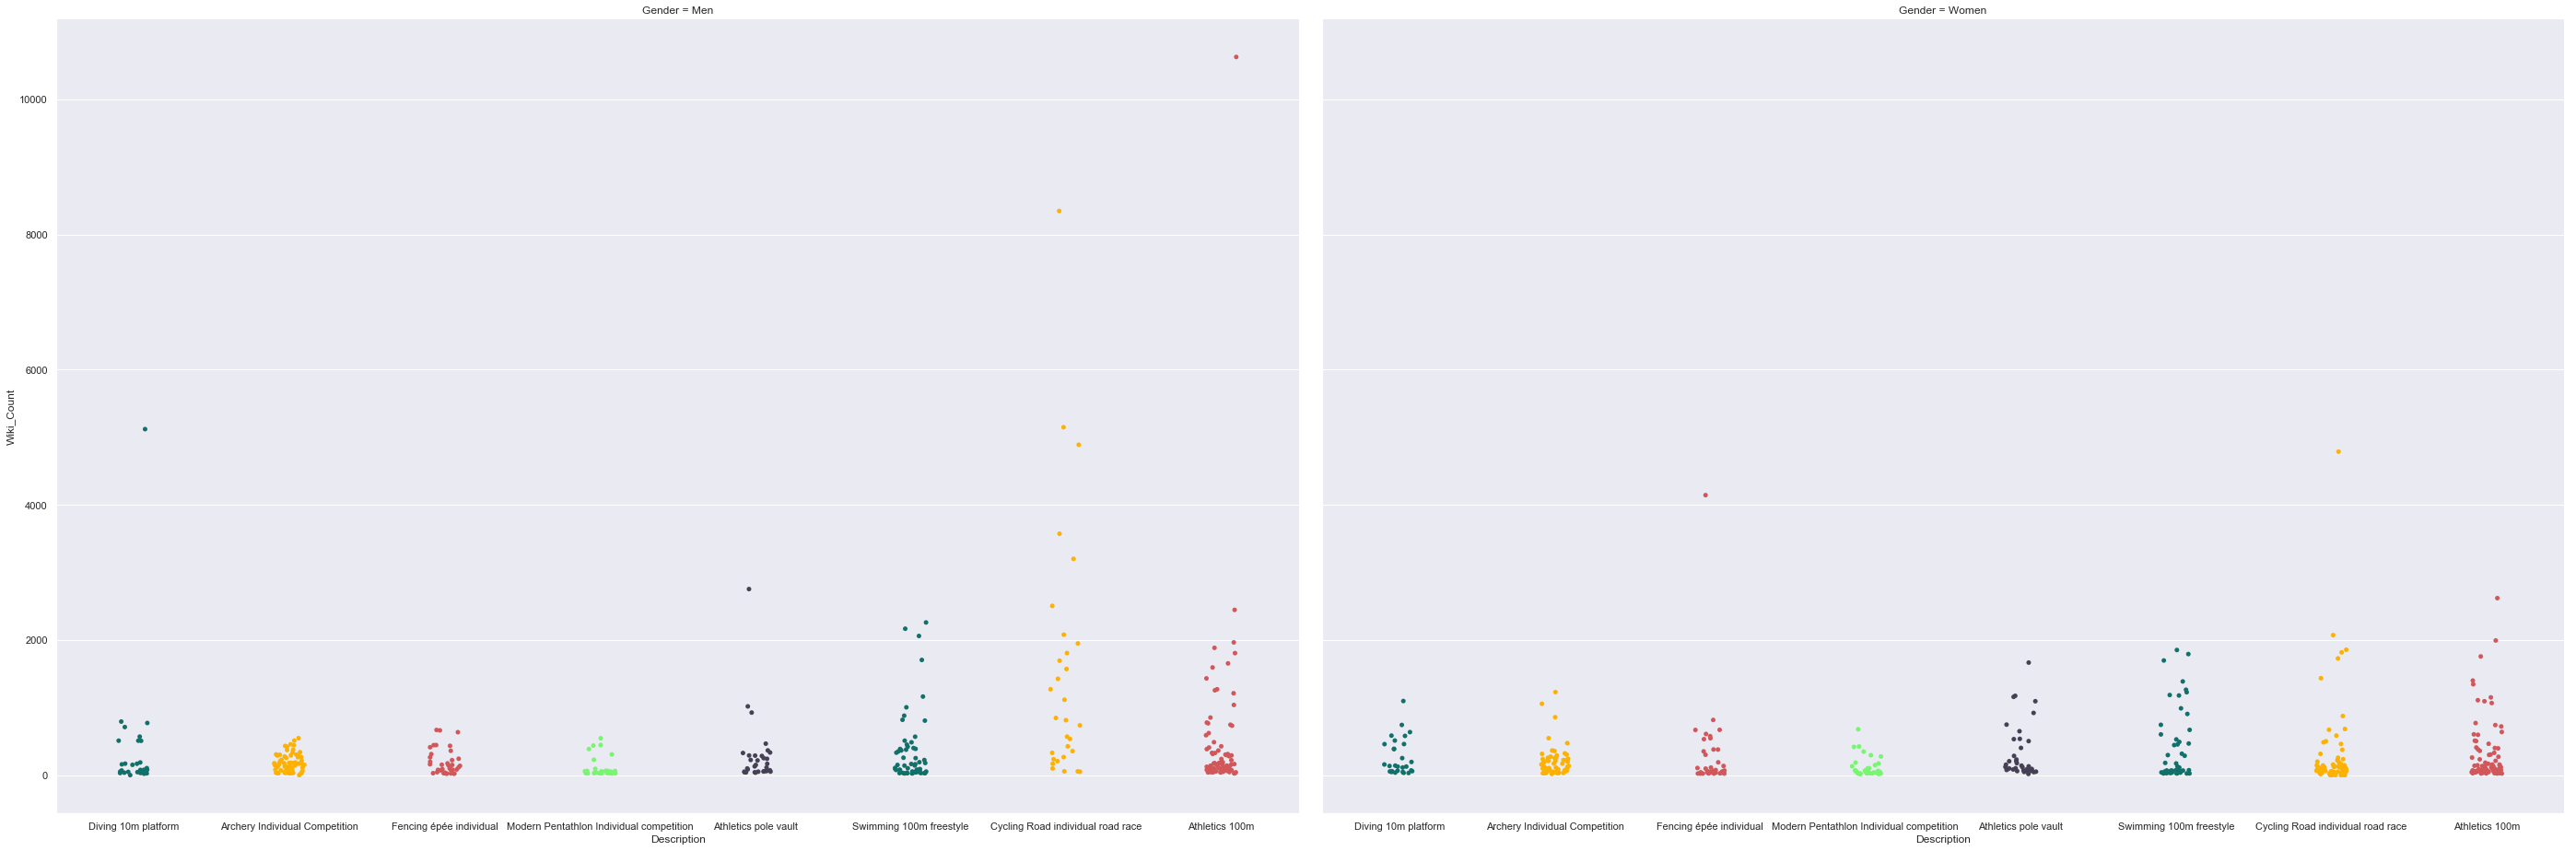

In [334]:
g = sns.FacetGrid(alldata, col="Gender",  height=13, aspect=1.5, hue="Description")
g.map(sns.stripplot,"Description", "Wiki_Count", order = alldata.Description.unique(),  palette=["#12706A", "#FDB102", "#D1575A", "#77F66F", "#454054"])
g.savefig("wordcount_stripplot.png")

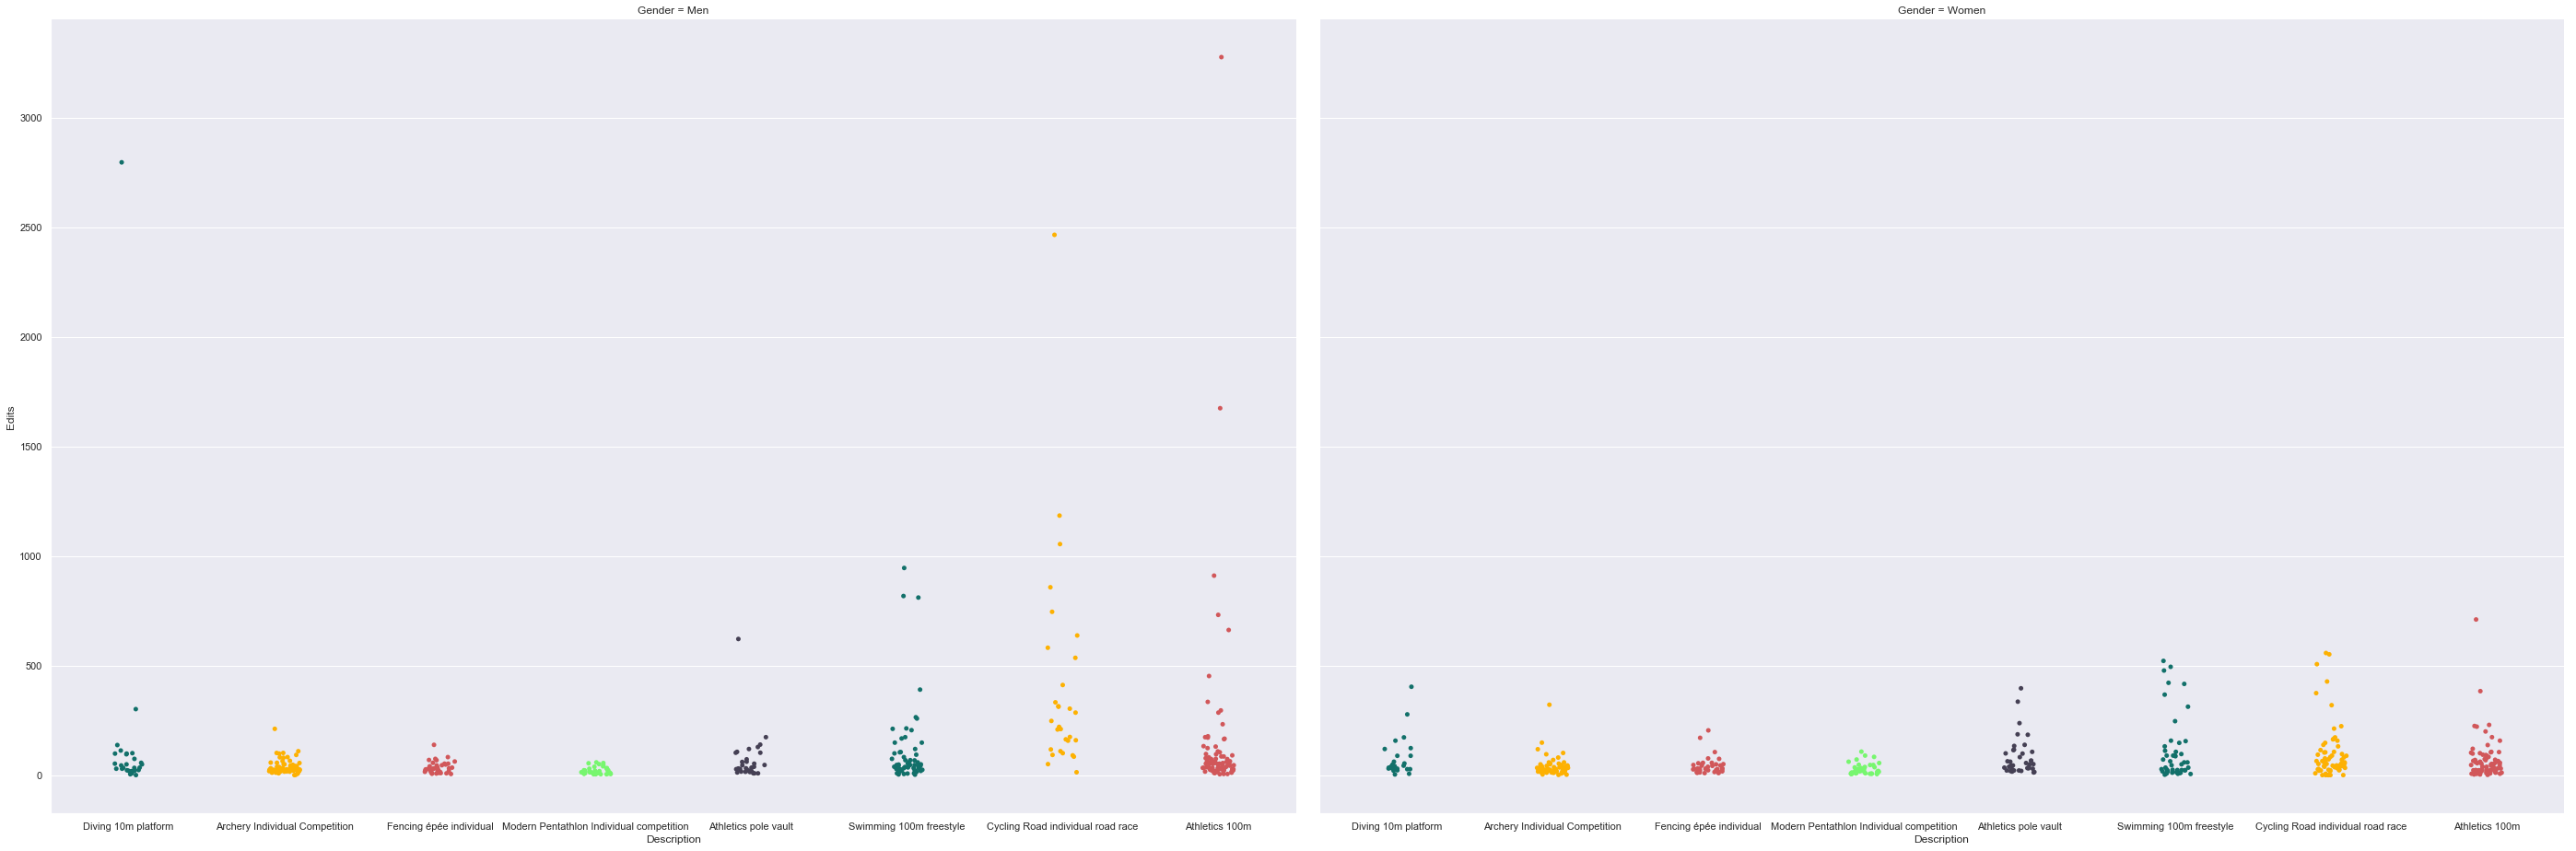

In [335]:
g = sns.FacetGrid(alldata, col="Gender",  height=13, aspect=1.5, hue="Description")
g.map(sns.stripplot,"Description", "Edits", order = alldata.Description.unique(), palette=["#12706A", "#FDB102", "#D1575A", "#77F66F", "#454054"])
g.savefig("editcount_stripplot.png")

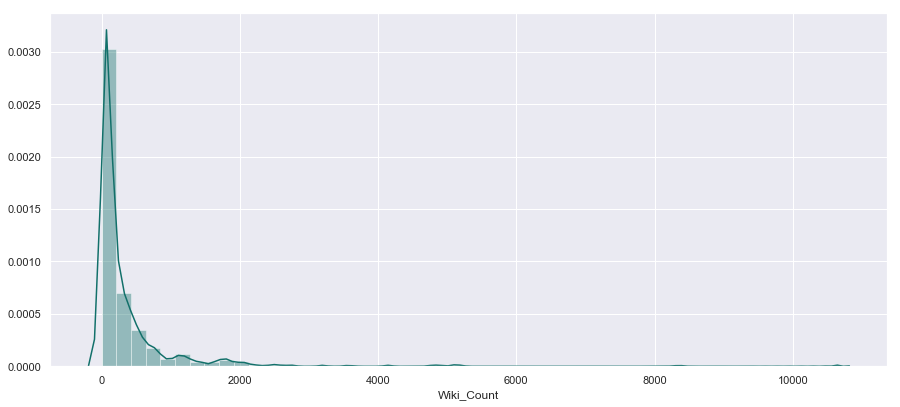

In [342]:
#histogram of all data for word count
plt.figure(figsize=(15,6.5))
sns.distplot(alldata.Wiki_Count)
# plt.show()
plt.savefig("wordcount_histogram")

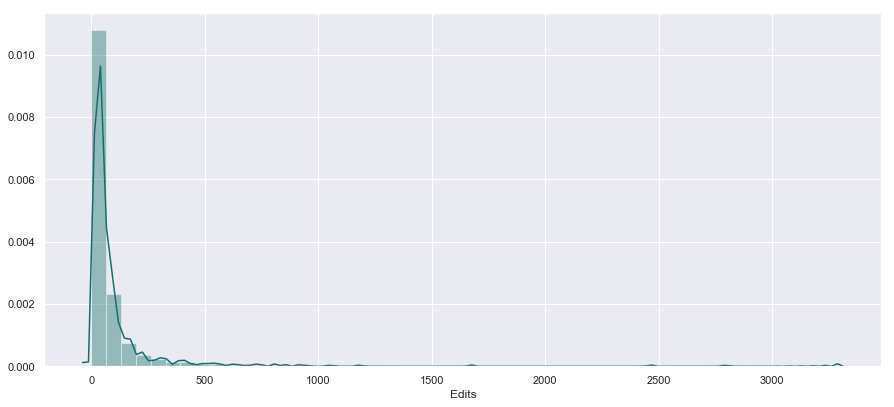

In [343]:
#histogram of all data for edits
plt.figure(figsize=(15,6.5))
sns.distplot(alldata.Edits)
# plt.show()
plt.savefig("editcount_histogram")

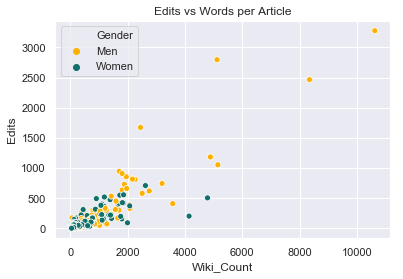

In [353]:
#scatterplot - hypothesis: the more words per article, the more edits
# sns.set()
sns.scatterplot(x="Wiki_Count", y="Edits", hue="Gender", sizes=(10, 200), data=alldata, palette=["#FDB102", "#12706A"])
plt.title('Edits vs Words per Article')
plt.savefig("edits_vs_words.png");

In [339]:
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
#Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U.
#Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
# Do the Wordcounts differ by the sex of the athlete?
#Source: https://www.statisticssolutions.com/mann-whitney-u-test/
stats.mannwhitneyu(men.Wiki_Count, women.Wiki_Count)

MannwhitneyuResult(statistic=68133.5, pvalue=0.02799997038752015)

In [340]:
all_disciplines = np.asarray(alldata.Event.unique())
amout_of_disciplines = len(all_disciplines)
utest_results = []
pvalues = []
significance = []
for discipline in all_disciplines:
    utest_result = stats.mannwhitneyu(men.loc[men['Event'] == discipline].Wiki_Count,
                                         women.loc[women['Event'] == discipline].Wiki_Count)
    utest_results.append(utest_result.statistic)
    pvalues.append(utest_result.pvalue)
    if utest_result.pvalue <= 0.05:
        significance.append("significant")
    else:
        significance.append("not significant")

pd.DataFrame({'Discipline' :alldata.Description.unique(),
#               'Utest Statistic' :np.asarray(utest_results),
              'P Value': np.asarray(pvalues),
              'Significance' : np.asarray(significance)})

,Discipline,P Value,Significance
0,Diving 10m platform,1.690800e-01,not significant
1,Archery Individual Competition,2.440222e-01,not significant
2,Fencing épée individual,2.906772e-01,not significant
3,Modern Pentathlon Individual competition,3.782122e-01,not significant
4,Athletics pole vault,2.451830e-01,not significant
5,Swimming 100m freestyle,4.563503e-01,not significant
6,Cycling Road individual road race,2.591859e-07,significant
7,Athletics 100m,9.354463e-02,not significant


In [341]:
all_disciplines = np.asarray(alldata.Event.unique())
amout_of_disciplines = len(all_disciplines)
utest_results = []
pvalues = []
significance = []
for discipline in all_disciplines:
    utest_result = stats.mannwhitneyu(men.loc[men['Event'] == discipline].Edits,
                                         women.loc[women['Event'] == discipline].Edits)
    utest_results.append(utest_result.statistic)
    pvalues.append(utest_result.pvalue)
    if utest_result.pvalue <= 0.05:
        significance.append("significant")
    else:
        significance.append("not significant")

pd.DataFrame({'Discipline' :alldata.Description.unique(),
#               'Utest Statistic' :np.asarray(utest_results),
              'P Value': np.asarray(pvalues),
              'Significance' : np.asarray(significance)})

,Discipline,P Value,Significance
0,Diving 10m platform,2.693526e-01,not significant
1,Archery Individual Competition,2.836403e-01,not significant
2,Fencing épée individual,1.809164e-01,not significant
3,Modern Pentathlon Individual competition,9.551464e-02,not significant
4,Athletics pole vault,6.945469e-02,not significant
5,Swimming 100m freestyle,3.770569e-01,not significant
6,Cycling Road individual road race,3.837596e-08,significant
7,Athletics 100m,2.755057e-02,significant
